In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## IMPORT DATA

In [4]:
import utils.mnist_reader as mnist_reader
from utils import mnist_reader
XM_train, YM_train = mnist_reader.load_mnist('data-FM/fashion', kind='train')
XM_test, YM_test = mnist_reader.load_mnist('data-FM/fashion', kind='t10k')

# divide training data to two parts, one for training, and the other is for validation, then, normalized the datas.
inds = np.arange(len(XM_train))
np.random.seed(5)
np.random.shuffle(inds)
train_inds = inds[:50000]
valid_inds = inds[50000:]

x_train = np.array(XM_train[train_inds,:]).T
# xt_mean = np.mean(x_train)
# xt_std = np.std(x_train)
# x_train = (x_train-xt_mean)/xt_std
y_train = np.array(YM_train[train_inds])
print('x_train:',np.shape(x_train))
print('y_train:',np.shape(y_train))

x_valid = np.array(XM_train[valid_inds,:]).T
# xv_mean = np.mean(x_valid)
# xv_std = np.std(x_valid)
# x_valid = (x_valid-xv_mean)/xv_std
y_valid = np.array(YM_train[valid_inds])
print('x_valid:',np.shape(x_valid))
print('y_valid:',np.shape(y_valid))

x_test = np.array(XM_test).T
# xte_mean = np.mean(x_test)
# xte_std = np.std(x_test)
# x_test = (x_test-xte_mean)/xte_std
y_test = np.array(YM_test)
print('x_test:',np.shape(x_test))
print('y_test:',np.shape(y_test))

x_train: (784, 50000)
y_train: (50000,)
x_valid: (784, 10000)
y_valid: (10000,)
x_test: (784, 10000)
y_test: (10000,)


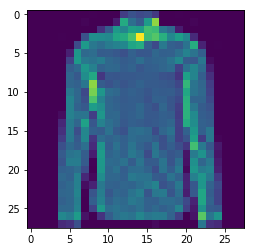

In [5]:
x_train1 = (x_train[:,1]).reshape(28,28)
plt.imshow(x_train1)

## Naive Bayes

### ---- GaussianNB

In [24]:
#calculate the probility of each kind: p(class)
def stat_prob(label):
    label_unique = np.unique(label)
    n_unique = len(label_unique)
    n = len(label)
    count = np.zeros(n_unique)
    for i in range(n):
        count[label[i]] += 1
    probability = count/n
    return probability

In [35]:
# demande for data: x is row vector. So we need .T to get it.
# only one parameter : priors. Default value is none.Prior probabilities of the classes. 
# If specified the priors are not adjusted according to the data.
from sklearn.naive_bayes import GaussianNB
def Gauss_NB(num_train,num_valid): 
    probability = stat_prob(y_train)
    # Here I use all training data for calculating probability. If I use only 1000 training data, then number of mislabeled is 959
    gnb = GaussianNB(priors = probability)
    gnb.fit(x_train[:,:num_train].T, y_train[:num_train])
    y_pred = gnb.predict(x_valid[:,:num_valid].T)
    print("Number of mislabeled points out of a total %d points : %d"
          % (num_valid,(y_valid[:num_valid] != y_pred).sum()))

In [36]:
Gauss_NB(5000,5000)

Number of mislabeled points out of a total 5000 points : 2323


### ---- MultinomialNB 

In [55]:
from sklearn.naive_bayes import MultinomialNB
#alpha : float, optional (default=1.0) Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).
def Multi_NB(num_train,num_valid): 
    probability = stat_prob(y_train)
    mnb = MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
    mnb.fit(x_train[:,:num_train].T, y_train[:num_train])
    y_pred = mnb.predict(x_valid[:,:num_valid].T)
    print("Number of mislabeled points out of a total %d points : %d"
          % (num_valid,(y_valid[:num_valid] != y_pred).sum()))

In [54]:
Multi_NB(5000,5000)

Number of mislabeled points out of a total 5000 points : 1726


### ---- BernoulliNB

In [64]:
from sklearn.naive_bayes import BernoulliNB
'''
alpha : float, optional (default=1.0) Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).

binarize : float or None, optional (default=0.0) We choose default value.

fit_prior : boolean, optional (default=True)

    Whether to learn class prior probabilities or not. If false, a uniform prior will be used.

class_prior : array-like, size=[n_classes,], optional (default=None)

    Prior probabilities of the classes. If specified the priors are not adjusted according to the data.

'''
def Bern_NB(num_train,num_valid): 
#    probability = stat_prob(y_train)
#    bnb = BernoulliNB(fit_prior = False, class_prior = probability)
    bnb = BernoulliNB()
    bnb.fit(x_train[:,:num_train].T, y_train[:num_train])
    y_pred = bnb.predict(x_valid[:,:num_valid].T)
    print("Number of mislabeled points out of a total %d points : %d"
          % (num_valid,(y_valid[:num_valid] != y_pred).sum()))

In [65]:
Bern_NB(5000,5000)

Number of mislabeled points out of a total 5000 points : 1496
